# **FML - Report - Binary Classification Task**

## Mounting Drive and importing data

### Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
!ls '/content/drive/MyDrive/University/Year-2/ML Notebooks/Assignment/data'

sample_valid_predictions.csv  test.csv	training1.csv  training2.csv


In [4]:
pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 6.8MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [5]:
#Imports for Report - Binary Classification Task
import numpy as np
from numpy import linspace,arange,zeros,ones,concatenate,sum,abs,int,meshgrid,c_,r_,unique,ceil,dot,sqrt
from numpy.random import normal,multivariate_normal

import matplotlib.pyplot as plt

from scipy.stats import norm
import pandas as pd

from sklearn.linear_model import Perceptron
from sklearn.utils import shuffle # Will use to prepare the synthetic data
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, hinge_loss, confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.linalg as linalg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



### Loading Data

In [6]:
train_data1=pd.read_csv('/content/drive/MyDrive/University/Year-2/ML Notebooks/Assignment/data/training1.csv')
train_data2=pd.read_csv('/content/drive/MyDrive/University/Year-2/ML Notebooks/Assignment/data/training2.csv')
test_data=pd.read_csv('/content/drive/MyDrive/University/Year-2/ML Notebooks/Assignment/data/test.csv')
sample_predictions = pd.read_csv('/content/drive/MyDrive/University/Year-2/ML Notebooks/Assignment/data/sample_valid_predictions.csv')


## Pre - Processing

Concatenating Training Sets

In [7]:
#Concatenating Data Sets
train_complete = [train_data1, train_data2]
train_data = pd.concat(train_complete)

In [10]:
print(train_data)


         CNNs   CNNs.1   CNNs.2   CNNs.3  ...  GIST.510  GIST.511  label  confidence
0     0.00000  0.00000  0.25454  0.00000  ...  0.029973  0.037133    0.0        0.66
1     0.00000  0.27491  1.11130  0.00000  ...  0.027765  0.019326    0.0        0.66
2     0.00000  0.00000  0.23664  0.56718  ...  0.026313  0.025235    0.0        1.00
3     0.77101  0.00000  0.00000  0.00000  ...  0.033228  0.026239    0.0        0.66
4     0.00000  0.00000  1.43390  0.00000  ...  0.008928  0.012252    1.0        1.00
...       ...      ...      ...      ...  ...       ...       ...    ...         ...
2995  0.00000  0.00000  0.38509  1.51270  ...  0.019765       NaN    0.0        1.00
2996  0.00000  0.60762  0.44145  1.50870  ...  0.032523  0.019196    0.0        0.66
2997      NaN  0.00000  0.63908  0.00000  ...       NaN  0.063759    1.0        1.00
2998      NaN  0.11003  0.00000  0.26777  ...  0.010782  0.014149    0.0        0.66
2999      NaN  0.00000  0.77601  0.00000  ...  0.025381       NaN

In [8]:
#Assigning Confidence and Labels
labels = train_data['label']
confidence = train_data['confidence']

In [9]:
#Splitting features
pre_train = train_data.iloc[:,:-2]
cnn_data = pre_train.iloc[:,:-512]
gist_data = pre_train.iloc[:,-512:]

#cnn_data.shape, gist_data.shape

### Imputing Data(Interpolating using Pandas datafram)

In [14]:
#Imputing/Interpolating Data
#train_set2 = train_data.fillna(0)
cnn_data2 = cnn_data.fillna(0)
gist_data2 = gist_data.fillna(0)
test_data2 = test_data.fillna(0)

### Scaling the Data

In [15]:
# scaling data - needed or this error appears "ConvergenceWarning: lbfgs failed to converge (status=1):"
scaler = StandardScaler()

scaler.fit(cnn_data2)
cnn_s = scaler.transform(cnn_data2)

scaler.fit(gist_data2)
gist_s = scaler.transform(gist_data2)

scaler.fit(test_data2)
test_data3 = scaler.transform(test_data2)


In [16]:
#concatenating data sets together again
proc = [pd.DataFrame(cnn_s), pd.DataFrame(gist_s)]
train_set2 = pd.concat(proc, axis=1)
train_set2.shape

(3615, 4608)

### Input Normalisation of Training Data

---



In [17]:
#Input Normalisation - training data

train_set3 = (train_set2-np.mean(train_set2,0))/np.std(train_set2,0);

### Input Normalisation of Test Data

In [18]:
#Input Normalisation - test data
test_set = (test_data3-np.mean(test_data3,0))/np.std(test_data3,0);

## Train Validation split

### Training Data Set

In [20]:
#train-validation split
train_d, train_val, train_labels, val_labels, train_confidence, val_confidance  = train_test_split(train_set2,labels, confidence, test_size=0.2, random_state=1)

In [21]:
train_d.shape

(2892, 4608)

## Simple Logisitic Regression

### For Training Set

In [24]:
# Creating a classifier object
log_classifier1 = LogisticRegression()
# Fit it to the data
log_classifier1.fit(train_d,train_labels,train_confidence)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [25]:
#prediction and accuracy score
import sklearn.metrics as metrics
log_pred = log_classifier1.predict(train_val)
metrics.accuracy_score(log_pred, val_labels)

0.6749654218533887

### Random Forest Classifier

In [36]:
#Random Forest
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
#Pipeline - including ExtraTreesClassifier
#hyperparameters for classifier
rf_clf = Pipeline([
  ('feature_selection', SelectFromModel(ExtraTreesClassifier(n_estimators=50))),
  ('classification', RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                            min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                            min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, 
                                            warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None))
])
rf_clf.fit(train_d, train_labels)
rf_pred = rf_clf.predict(train_val) # Prediction after learning

#print('Process completed in %d epochs' % slp_clf.n_iter_['classification'])
print('Classification accuracy = %d' % accuracy_score(val_labels, rf_pred, normalize=False))
print(confusion_matrix(val_labels, rf_pred)) # Confusion matrix

Classification accuracy = 536
[[300  94]
 [ 93 236]]


In [37]:
#Accuracy
metrics.accuracy_score(val_labels,rf_pred)

0.7413554633471646

In [38]:
#F1 Score
from sklearn.metrics import f1_score
f1_score(val_labels,rf_pred)

0.7162367223065251

In [39]:
#Precision
from sklearn.metrics import precision_score
precision_score(val_labels,rf_pred, average='macro')

0.7392551468887347

In [40]:
#Recall
from sklearn.metrics import recall_score
recall_score(val_labels,rf_pred, average='macro')

0.7393732738802401

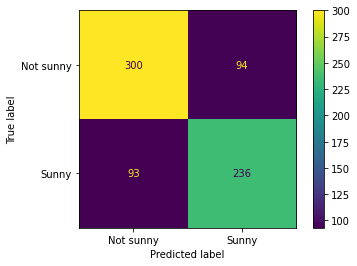

In [41]:
metrics.plot_confusion_matrix(rf_clf, X=train_val ,y_true=val_labels, display_labels=["Not sunny","Sunny"], values_format='d')

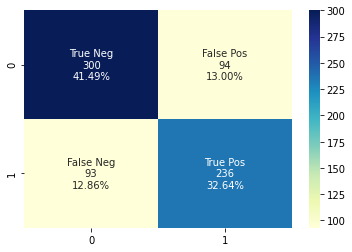

In [42]:
# Applied in similar ways from this tutorial https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
#Improved confusion matrix
import seaborn as sns
c_mat = confusion_matrix(val_labels,rf_pred)

#specifying group names
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                c_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     c_mat.flatten()/np.sum(c_mat)]
labels2 = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels2 = np.asarray(labels2).reshape(2,2)
sns.heatmap(c_mat, annot=labels2, fmt='', cmap='YlGnBu')

## Single Layer Perceptron

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
#Single Layer Pipeline
slp_clf = Pipeline([
  ('feature_selection', SelectFromModel(ExtraTreesClassifier(n_estimators=50))),
  ('classification', Perceptron(penalty='elasticnet', alpha=0.05,l1_ratio=0.15, fit_intercept=False, max_iter = 200, 
                                tol=0.005, shuffle=True, verbose=1, eta0=1.0, n_jobs=None, 
                     random_state=0, early_stopping=True, validation_fraction=0.2, n_iter_no_change=5, class_weight='balanced'))
])
slp_clf.fit(train_d, train_labels)
pred_class = slp_clf.predict(train_val) # Prediction after learning

#print('Process completed in %d epochs' % slp_clf.n_iter_['classification'])
print('Classification accuracy = %d' % accuracy_score(val_labels, pred_class, normalize=False))
print(confusion_matrix(val_labels, pred_class)) # Confusion matrix


-- Epoch 1
Norm: 75.52, NNZs: 98, Bias: 0.000000, T: 2313, Avg. loss: 14.857458
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 94.09, NNZs: 55, Bias: 0.000000, T: 4626, Avg. loss: 4.332990
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 86.37, NNZs: 32, Bias: 0.000000, T: 6939, Avg. loss: 2.597690
Total training time: 0.12 seconds.
-- Epoch 4
Norm: 72.20, NNZs: 17, Bias: 0.000000, T: 9252, Avg. loss: 2.387796
Total training time: 0.17 seconds.
-- Epoch 5
Norm: 104.69, NNZs: 49, Bias: 0.000000, T: 11565, Avg. loss: 2.217611
Total training time: 0.22 seconds.
-- Epoch 6
Norm: 71.07, NNZs: 19, Bias: 0.000000, T: 13878, Avg. loss: 2.189741
Total training time: 0.26 seconds.
-- Epoch 7
Norm: 75.45, NNZs: 24, Bias: 0.000000, T: 16191, Avg. loss: 1.804885
Total training time: 0.31 seconds.
Convergence after 7 epochs took 0.31 seconds
Classification accuracy = 506
[[311  83]
 [134 195]]


In [ ]:
# Plotting Weights
#print('Final weights are: %f %f %f\n' % (slp_clf.coef_[0][0], slp_clf.coef_[0][1], slp_clf.intercept_))

In [33]:
#Accuracy
metrics.accuracy_score(val_labels, pred_class)

0.6998616874135546

In [43]:
#F1 Score
from sklearn.metrics import f1_score
f1_score(val_labels, pred_class)

0.642504118616145

In [44]:
#Precision
from sklearn.metrics import precision_score
precision_score(val_labels, pred_class, average='macro')

0.7001576267076226

In [45]:
#Recall
from sklearn.metrics import recall_score
recall_score(val_labels, pred_class, average='macro')

0.6910226343480474

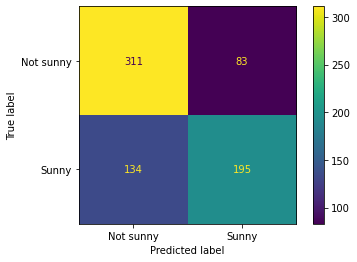

In [46]:
#Confusion Matrix
metrics.plot_confusion_matrix(slp_clf, X=train_val ,y_true=val_labels, display_labels=["Not sunny","Sunny"], values_format='d')

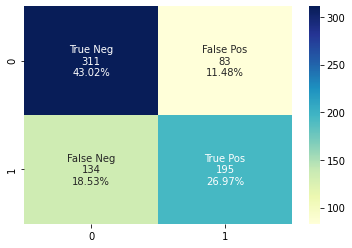

In [47]:
# Applied in similar ways from this tutorial https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

import seaborn as sns
c_mat = confusion_matrix(val_labels,pred_class)


group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                c_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     c_mat.flatten()/np.sum(c_mat)]
labels2 = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels2 = np.asarray(labels2).reshape(2,2)
sns.heatmap(c_mat, annot=labels2, fmt='', cmap='YlGnBu')

## Multilayer Perceptron

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
mlp_clf = Pipeline([
  ('feature_selection', SelectFromModel(ExtraTreesClassifier(n_estimators=40))),
  ('classification', MLPClassifier(activation='logistic',solver='sgd',learning_rate='invscaling', hidden_layer_sizes=(100), shuffle=True,
                    learning_rate_init=0.7,random_state = 2, momentum=0.5, nesterovs_momentum=False, max_iter=200,beta_1 =0.9, beta_2 = 0.999, epsilon = 1e-8))
])
mlp_clf.fit(train_d, train_labels)

pred_class2 = mlp_clf.predict(train_val)

#print('Process completed in %d epochs' % mlp_clf.n_iter_)
print('Classification accuracy = %d' % accuracy_score(val_labels, pred_class2, normalize=False))
print(confusion_matrix(val_labels,pred_class2)) # Confusion matrix

Classification accuracy = 543
[[293 101]
 [ 79 250]]


In [ ]:
#Accuracy Score
metrics.accuracy_score(val_labels,pred_class2)

0.7510373443983402

In [ ]:
#F1 score
from sklearn.metrics import f1_score
f1_score(val_labels,pred_class2)

0.7352941176470589

In [ ]:
#Precision 
from sklearn.metrics import precision_score
precision_score(val_labels,pred_class2, average='macro')

0.7499425604264314

In [ ]:
#Recall
from sklearn.metrics import recall_score
recall_score(val_labels,pred_class2, average='macro')

0.7517666208939564

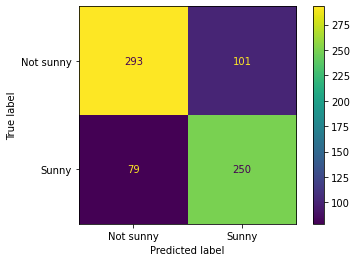

In [ ]:
#CF Matrix
metrics.plot_confusion_matrix(mlp_clf, X=train_val ,y_true=val_labels, display_labels=["Not sunny","Sunny"], values_format='d')

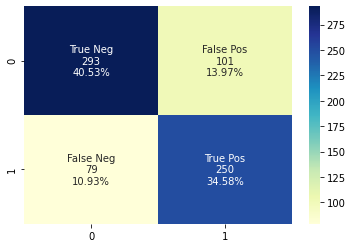

In [ ]:
import seaborn as sns
c_mat = confusion_matrix(val_labels,pred_class2)


group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                c_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     c_mat.flatten()/np.sum(c_mat)]
labels2 = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels2 = np.asarray(labels2).reshape(2,2)
sns.heatmap(c_mat, annot=labels2, fmt='', cmap='YlGnBu')

## Test Predictions

### Logistic Regression

In [ ]:
#On Test
log_pred_test = log_classifier1.predict(test_set)

In [ ]:
#metrics.accuracy_score(log_pred_test,sample_predictions)

0.48777111213659435

In [ ]:
#Predictions
predictions = pd.DataFrame(log_pred_test, columns=['prediction'])
predictions

,prediction
0,0.0
1,1.0
2,1.0
3,0.0
4,1.0
...,...
2162,0.0
2163,0.0
2164,0.0
2165,1.0


### Random Forest

In [ ]:
#On test
rf_pred_test = rf_clf.predict(test_set)

In [ ]:
#metrics.accuracy_score(rf_pred_test,sample_predictions)

0.49653899400092294

In [ ]:
#On predictions
rf_predictions = pd.DataFrame(rf_pred_test, columns=['prediction'])
rf_predictions

,prediction
0,1.0
1,1.0
2,1.0
3,0.0
4,1.0
...,...
2162,0.0
2163,0.0
2164,0.0
2165,1.0


### Single Layer Perceptron

In [ ]:
#On test
slp_pred_test = slp_clf.predict(test_set)

In [ ]:
#metrics.accuracy_score(slp_pred_test,sample_predictions)

0.49561605906783573

In [ ]:
predictions2 = pd.DataFrame(slp_pred_test, columns=['prediction'])
predictions2

,prediction
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
2162,0.0
2163,0.0
2164,0.0
2165,1.0


### Multi Layer Perceptron

In [ ]:
#On test
mlp_pred_test = mlp_clf.predict(test_set)

In [ ]:
#metrics.accuracy_score(mlp_pred_test,sample_predictions)

0.4946931241347485

In [ ]:
#predictions
predictions3 = pd.DataFrame(mlp_pred_test, columns=['predictions'])
predictions3

,predictions
0,1.0
1,1.0
2,1.0
3,0.0
4,1.0
...,...
2162,0.0
2163,0.0
2164,0.0
2165,1.0


In [ ]:
#saving predictions to file
predictions3.to_csv('predictions.csv', index=False)
!cp predictions.csv '/content/drive/MyDrive/University/Year-2/ML Notebooks/Assignment/'

## Testing and Experimenting

### Principle Component Analysis
For first training data set

In [ ]:
pca = PCA(n_components=3).fit(train_set2)
pca.fit(train_set2)

PCA(n_components=3)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


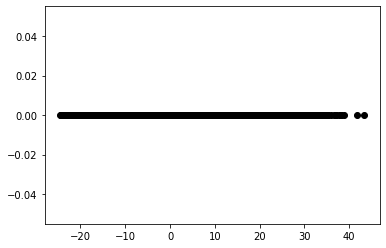

In [ ]:
C = np.cov(train_set2.T) # covariance matrix of the normalised data
[lambda_arr,U] = linalg.eig(C) # array of lambda (eigenvalues) and U (eigenvector matrix)
largest_eig_idx = np.where(lambda_arr==max(lambda_arr))[0] #index of largest eigenvalue
train_reduced = np.dot(train_set2,U[:,largest_eig_idx]); #matrix vector multiplication - dot product
plt.scatter(train_reduced,np.zeros((len(train_reduced),1)),c='k'); # in black
plt.show()

In [ ]:
smaller_eig_idx = np.where(lambda_arr==min(lambda_arr))[0] # Find index of the smaller eigenvalue
train_PC2 = np.dot(train_set2,U[:,smaller_eig_idx]) # Extract component in direction of eigenvector with smaller eigenvalue

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


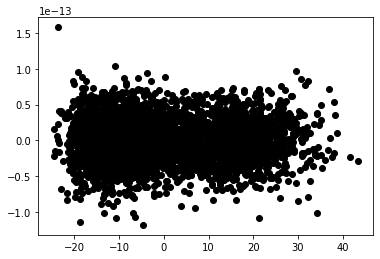

In [ ]:
plt.scatter(train_reduced,train_PC2,c='k'); # in black
plt.show()

In [ ]:
train_reduced.shape

(2711, 1)

In [ ]:
pca = PCA(n_components=3, copy=False, whiten=False, svd_solver='auto')
pca.fit(train_set2)

PCA(copy=False, n_components=3)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
mlp_clf = Pipeline([
  ('feature_selection', SelectFromModel(ExtraTreesClassifier(n_estimators=50))),
  ('classification', MLPClassifier(activation='logistic',solver='sgd',learning_rate='invscaling', hidden_layer_sizes=(500), shuffle=True,
                    learning_rate_init=0.5,random_state = 2, momentum=0.6, nesterovs_momentum=False, max_iter=1000,beta_1 =0.9, beta_2 = 0.999, epsilon = 1e-8))
])
mlp_clf.fit(train_d, train_labels)

pred_class2 = mlp_clf.predict(train_val)

#print('Process completed in %d epochs' % mlp_clf.n_iter_)
print('Classification accuracy = %d' % accuracy_score(val_labels, pred_class2, normalize=False))
print(confusion_matrix(val_labels,pred_class2)) # Confusion matrix

### KNN Imputation

In [ ]:
imputer = KNNImputer(missing_values=np.nan)

imputer.fit(gist_data)
gist_data1 = imputer.transform(gist_data)

imputer.fit(cnn_data)
cnn_data1 = imputer.transform(cnn_data)

imputer.fit(test_data)
test_data1 = imputer.transform(test_data)


### Training Set

In [ ]:
#1st parameters worse than logistic regression
slp_clf = Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=False, verbose=0, eta0=1.0, n_jobs=None, 
                     random_state=0, early_stopping=False, validation_fraction=0.2, n_iter_no_change=5, class_weight='balanced') 

slp_clf.fit(train_d,train_labels)

Perceptron(class_weight='balanced', shuffle=False, validation_fraction=0.2)

In [ ]:
#2nd parameters - significantly better
slp_clf = Perceptron(penalty=None, alpha=0.2, fit_intercept=True, max_iter=500, tol=0.2, shuffle=False, verbose=0, eta0=2.0, n_jobs=None, 
                     random_state=None, early_stopping=False, validation_fraction=0.25, n_iter_no_change=5, class_weight='balanced') 
slp_clf.fit(train_d,train_labels)

Perceptron(alpha=0.2, class_weight='balanced', eta0=2.0, max_iter=500,
           random_state=None, shuffle=False, tol=0.2, validation_fraction=0.25)

In [ ]:
#3rd paramerts - best so far - 70 accuracy
slp_clf = Perceptron(penalty='elasticnet', alpha=0.05, fit_intercept=True, max_iter=500, tol=0.05, shuffle=False, verbose=1, eta0=2.0, n_jobs=None, 
                     random_state=None, early_stopping=False, validation_fraction=0.25, n_iter_no_change=5, class_weight='balanced') 

slp_clf.fit(train_d,train_lables)

In [ ]:

slp_clf = Perceptron(penalty='elasticnet', alpha=0.005, fit_intercept=True, max_iter=500, tol=0.005, shuffle=False, verbose=1, eta0=1.0, n_jobs=None, 
                     random_state=None, early_stopping=False, validation_fraction=0.25, n_iter_no_change=5, class_weight='balanced') 

slp_clf.fit(train_d,train_labels)

In [ ]:
train_set3 = pca.transform(train_set2)

### Plotting first training data 

In [ ]:
train_reduced, train_lables = shuffle(train_reduced, train_lables)

In [ ]:
plt.figure(1)

plt.scatter(train_reduced[train_lables == 0, 0], train_reduced[train_lables ==0 , 1],c='red',s=6)
plt.scatter(train_reduced[train_lables == 1, 0], train_reduced[train_lables ==1 , 1],c='blue',s=6)

Validation Data

In [ ]:
#Validation Set Number 2
nbpts = 76.875 # Number of points in each class (vary to explore effect of number of points)

# Assign class labels.
classes = np.concatenate([np.zeros(nbpts,dtype=int),np.ones(nbpts,dtype=int)]) #integers

val_norm1, classes = shuffle(val_norm1,classes)

In [ ]:
 plt.figure(1)

plt.scatter(val_norm1.iloc[classes == 0, 0], val_norm1.iloc[classes ==0 , 1],c='red',s=6)
plt.scatter(val_norm1.iloc[classes == 1, 0], val_norm1.iloc[classes ==1 , 1],c='blue',s=6)

In [ ]:
#4th parameters a bit better 71 accuracy
slp_clf = Perceptron(penalty='elasticnet', alpha=0.005, fit_intercept=True, max_iter=500, tol=0.005, shuffle=False, verbose=1, eta0=1.0, n_jobs=None, 
                     random_state=None, early_stopping=False, validation_fraction=0.25, n_iter_no_change=5, class_weight='balanced') 

slp_clf.fit(train_d,train_lables)

### Plotting second training data set

In [ ]:
#Training Set Number 25 # Number of points in each class (vary to explore effect of number of points)

# Assign class labels.
classes = np.concatenate(train_lables,train_confidence) #integers

train_reduced, classes = shuffle(train_norm2,classes)

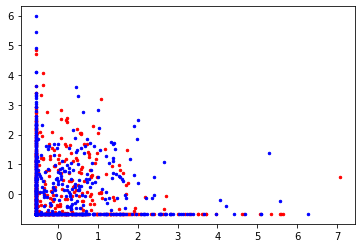

In [ ]:
 plt.figure(1)

plt.scatter(train_reduced.iloc[classes == 0, 0], train_reduced.iloc[classes ==0 , 1],c='red',s=6)
plt.scatter(train_reduced.iloc[classes == 1, 0], train_reduced.iloc[classes ==1 , 1],c='blue',s=6)

Validation Data

In [ ]:
#Validation Set Number 2
nbpts = 375 # Number of points in each class (vary to explore effect of number of points)

# Assign class labels.
classes = np.concatenate([np.zeros(nbpts,dtype=int),np.ones(nbpts,dtype=int)]) #integers

val_norm2, classes = shuffle(val_norm2,classes)

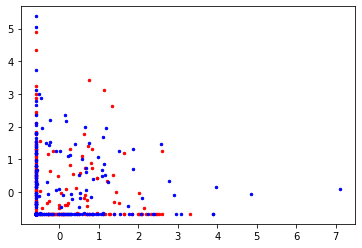

In [ ]:
 plt.figure(1)

plt.scatter(val_norm2.iloc[classes == 0, 0], val_norm2.iloc[classes ==0 , 1],c='red',s=6)
plt.scatter(val_norm2.iloc[classes == 1, 0], val_norm2.iloc[classes ==1 , 1],c='blue',s=6)

### Plotting test set

In [ ]:
#Test Set
nbpts = 1083.5 # Number of points in each class (vary to explore effect of number of points)

# Assign class labels.
classes = np.concatenate([np.zeros(nbpts,dtype=int),np.ones(nbpts,dtype=int)]) #integers

test_norm, classes = shuffle(test_norm,classes)

### Test SLP

In [ ]:
#73 again
slp_clf = Perceptron(penalty='elasticnet', alpha=0.05,l1_ratio=0.15, fit_intercept=False, max_iter = 200, tol=0.005, shuffle=False, verbose=2, eta0=1.0, n_jobs=None, 
                     random_state=None, early_stopping=True, validation_fraction=0.2, n_iter_no_change=4, class_weight='balanced') 

slp_clf.fit(train_d,train_labels)

In [ ]:
#73 again
slp_clf = Perceptron(penalty='elasticnet', alpha=0.005,l1_ratio=0.15, fit_intercept=False, max_iter=400, tol=0.005, shuffle=False, verbose=1, eta0=1.0, n_jobs=None, 
                     random_state=None, early_stopping=True, validation_fraction=0.2, n_iter_no_change=2, class_weight='balanced') 

slp_clf.fit(train_d,train_labels)

### Test MLP

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(mlp_clf,pred_class2,val_labels)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [ ]:
#The 2nd best
mlp_clf = MLPClassifier(activation='logistic',solver='sgd',learning_rate='invscaling', hidden_layer_sizes=(100), shuffle=True,
                    learning_rate_init=0.6,random_state = None, momentum=0.8, nesterovs_momentum=False, max_iter=200,beta_1 =0.9, beta_2 = 0.9, epsilon = 1e-8)

mlp_clf.fit(train_d,train_labels) 
pred_class2 = mlp_clf.predict(train_val) # Prediction after learning

print('Process completed in %d epochs' % mlp_clf.n_iter_)
print('Classification accuracy = %d' % accuracy_score(val_labels, pred_class2, normalize=False))
print(confusion_matrix(val_labels,pred_class2)) # Confusion matrix

Process completed in 200 epochs
Classification accuracy = 541
[[296  98]
 [ 84 245]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
mlp_clf = MLPClassifier(activation='logistic',solver='sgd',learning_rate='invscaling', hidden_layer_sizes=(125), shuffle=True,
                    learning_rate_init=0.5,random_state = 2, momentum=0.6, nesterovs_momentum=False, max_iter=200) #beta_1 =0.9, beta_2 = 0.999, epsilon = 1e-8)

mlp_clf.fit(train_d,train_labels) 
pred_class2 = mlp_clf.predict(train_val) # Prediction after learning

print('Process completed in %d epochs' % mlp_clf.n_iter_)
print('Classification accuracy = %d' % accuracy_score(val_labels, pred_class2, normalize=False))
print(confusion_matrix(val_labels,pred_class2)) # Confusion matrix

Process completed in 200 epochs
Classification accuracy = 544
[[294 100]
 [ 79 250]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
#even better - second best 0.74
mlp_clf = MLPClassifier(activation='logistic',solver='sgd',learning_rate='invscaling', hidden_layer_sizes=(100), shuffle=True,
                    learning_rate_init=0.8,random_state = None, momentum=0.9, nesterovs_momentum=False, max_iter=200,beta_1 =0.8, beta_2 = 0.9, epsilon = 1e-8)

mlp_clf.fit(train_d,train_labels) 
pred_class2 = mlp_clf.predict(train_val) # Prediction after learning

print('Process completed in %d epochs' % mlp_clf.n_iter_)
print('Classification accuracy = %d' % accuracy_score(val_labels, pred_class2, normalize=False))
print(confusion_matrix(val_labels,pred_class2)) # Confusion matrix

Process completed in 200 epochs
Classification accuracy = 536
[[292 102]
 [ 85 244]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
 mlp_clf = MLPClassifier(activation='relu',solver='sgd',batch_size = 'auto',learning_rate='constant', hidden_layer_sizes=(25), shuffle=True,
                    learning_rate_init=0.5, momentum=0.9, nesterovs_momentum=True, max_iter=1000)

epochs=np.zeros(10)
accuracy=np.zeros(10)
for i in range(10):

    mlp_clf.fit(train_d,train_labels) 
    pred_class2 =  mlp_clf.predict(train_val) # Prediction after learning
    epochs[i]= mlp_clf.n_iter_
    accuracy[i]=accuracy_score(val_labels, pred_class2, normalize=False)

    
print('Mean epochs =%d' % np.mean(epochs))
print('Std dev epochs =%d' % np.std(epochs))
print('Mean accuracy=%d' % np.mean(accuracy))
print('Std dev accuracy =%d' % np.std(accuracy))


Mean epochs =12
Std dev epochs =0
Mean accuracy=288
Std dev accuracy =79


In [ ]:
metrics.accuracy_score(pred_class, val_labels)

0.6459197786998617

In [ ]:
clf = MLPClassifier(activation='logistic',solver='sgd', hidden_layer_sizes=(25),
                    learning_rate_init=0.5,nesterovs_momentum=False,momentum=0.9,max_iter=400)

epochs=np.zeros(10)
accuracy=np.zeros(10)
for i in range(10):

    clf.fit(train_d,train_labels) 
    pred_class = clf.predict(val_train) # Prediction after learning
    epochs[i]=clf.n_iter_
    accuracy[i]=accuracy_score(train_labels, pred_class, normalize=False)

    
print('Mean epochs =%d' % np.mean(epochs))
print('Std dev epochs =%d' % np.std(epochs))
print('Mean accuracy=%d' % np.mean(accuracy))
print('Std dev accuracy =%d' % np.std(accuracy))

In [ ]:
mlp_clf = MLPClassifier(activation='logistic',solver='sgd', hidden_layer_sizes=(25),
                    learning_rate_init=0.5,nesterovs_momentum=False,momentum=0,max_iter=400)

epochs=np.zeros(10)
accuracy=np.zeros(10)
for i in range(10):

    mlp_clf.fit(train_d,train_labels) 
    pred_class2 =  mlp_clf.predict(train_val) # Prediction after learning
    epochs[i]= mlp_clf.n_iter_
    accuracy[i]=accuracy_score(train_labels, pred_class2, normalize=False)

    
print('Mean epochs =%d' % np.mean(epochs))
print('Std dev epochs =%d' % np.std(epochs))
print('Mean accuracy=%d' % np.mean(accuracy))
print('Std dev accuracy =%d' % np.std(accuracy))

Mean epochs =75
Std dev epochs =0
Mean accuracy=510
Std dev accuracy =3


In [ ]:
#best so far
mlp_clf = MLPClassifier(activation='logistic',solver='adam',learning_rate='constant', hidden_layer_sizes=(25), shuffle=False,
                    learning_rate_init=0.5,random_state = None, momentum=0.9, nesterovs_momentum=True, max_iter=200,beta_1 =0.5, beta_2 = 0.8, epsilon = 1e-8)

mlp_clf.fit(train_d,train_labels) 
pred_class2 = mlp_clf.predict(train_val) # Prediction after learning

print('Process completed in %d epochs' % mlp_clf.n_iter_)
print('Classification accuracy = %d' % accuracy_score(val_labels, pred_class2, normalize=False))
print(confusion_matrix(val_labels,pred_class2)) # Confusion matrix

Process completed in 13 epochs
Classification accuracy = 523
[[242 152]
 [ 48 281]]


In [ ]:
#The best
mlp_clf = MLPClassifier(activation='logistic',solver='sgd',learning_rate='invscaling', hidden_layer_sizes=(100), shuffle=True,
                    learning_rate_init=0.5,random_state = 2, momentum=0.6, nesterovs_momentum=False, max_iter=200,beta_1 =0.9, beta_2 = 0.999, epsilon = 1e-8)

mlp_clf.fit(train_d,train_labels) 
pred_class2 = mlp_clf.predict(train_val) # Prediction after learning

print('Process completed in %d epochs' % mlp_clf.n_iter_)
print('Classification accuracy = %d' % accuracy_score(val_labels, pred_class2, normalize=False))
print(confusion_matrix(val_labels,pred_class2)) # Confusion matrix